<a href="https://colab.research.google.com/github/honlai/Financial_Mathematics_I/blob/main/Exercises3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Execute simulations for (fractional) Kelly betting/trading



In [322]:
import random as rd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
W=0.7
L=1-W
NBets=100
stack=50
payout_odds=1.6

In [323]:
def give_ratio():
  rdn=np.random.binomial(1,W,size=NBets-1)
  #Win: to_bet_from_stack*payout_odds Loss: to_bet_from_stack=0
  ratio=np.where(rdn>0,payout_odds,0)
  #print(ratio)
  return ratio

###What Is the Kelly Criterion?
The Kelly Criterion is a formula used to determine the optimal size of a bet when the expected returns are known. According to the formula, the optimal bet is determined by the formula
####The Kelly percentage:
$$K\%=W-\frac{1-W}{po}$$
where
$W=$ Winning probability , $po=$ payout odds

In [324]:
def get_Kp(Wr=W,po=payout_odds):
  Kp=Wr-((1-Wr)/po)
  return Kp

In [325]:
def get_stacks(p_to_bet=0,ratio=np.ones(NBets)):
  st=np.zeros(NBets)
  st[0]=stack
  for bets in range(NBets-1):
    st[bets+1]=np.round(st[bets]*(1-p_to_bet))+np.round(np.round(st[bets]*p_to_bet)*ratio[bets])
    #print(st[bets+1])
  return st

In [326]:
def graph():
  r=give_ratio()
  st_Kp=get_stacks(get_Kp(),r)
  st_20=get_stacks(0.2,r)
  st_40=get_stacks(0.4,r)
  st_60=get_stacks(0.6,r)
  st_80=get_stacks(0.8,r)
  data = {'Kp': st_Kp,'20': st_20,'40': st_40,'60': st_60,'80': st_80}
  df = pd.DataFrame(data)
  df.plot()
  return

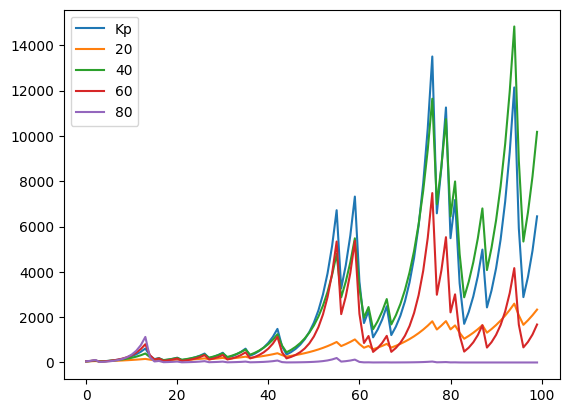

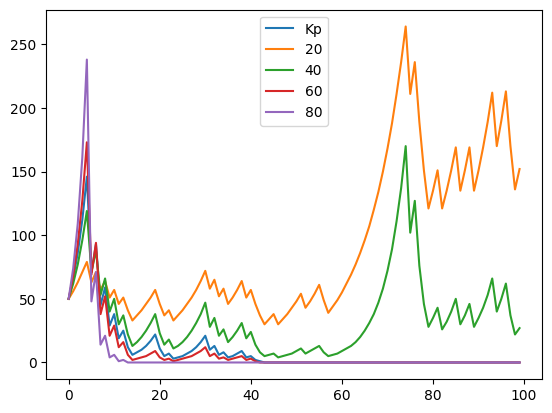

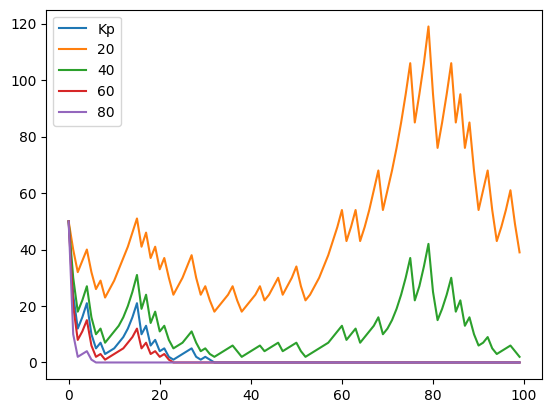

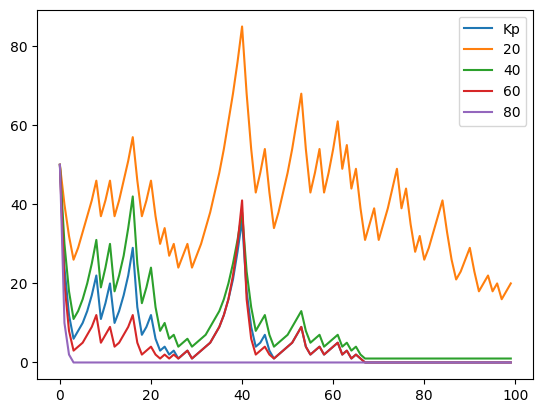

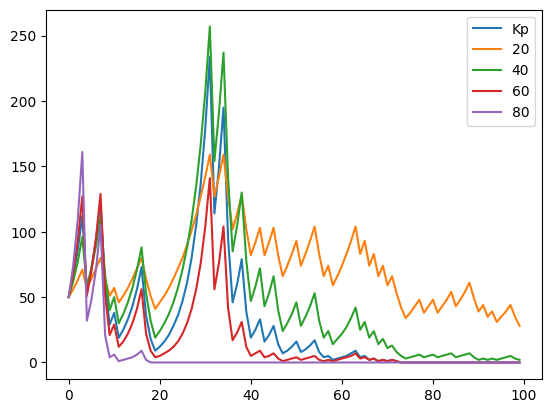

In [327]:
for i in range(5):
  graph()